In [0]:
# importing all the important libraries for analysis

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
import pandas_profiling as pp

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [0]:
# loading the train and the test data
train = pd.read_csv('train_bigmart.csv')
test = pd.read_csv('test_bigmart.csv')

In [4]:
# checking the  train data for null values
train.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
# checking the test data for null values
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [6]:
# general information about the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# general info about the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
# combining the both train and test data
data = pd.concat([train, test])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


Exploratory Data Analysis

In [0]:
# filling the missing values in the Item_Weight column with mean and Outlet_Size with mode as there are missing values
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].replace(0, np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mode()[0], inplace = True)

In [21]:
#checking the whole data for null values
data.isnull().sum()

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
dtype: int64

In [22]:
pp.ProfileReport(data)

Number of variables,13
Number of observations,14204
Total Missing (%),0.0%
Total size in memory,1.4 MiB
Average record size in memory,104.0 B
Numeric,6
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Feature Engineering


In [27]:
# replacing the various content values in the Item Fat Content variable 
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({ 'LF' : 'Low Fat', 'reg' : 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [26]:
# Getting the first two characters of ID to separate them into different categories

data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

Text(0.5, 1.0, 'Item MRP')

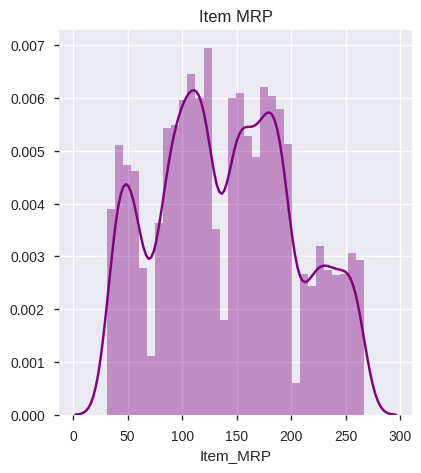

In [31]:
###  checking the distribution of a single variable using count plot for the whole data
plt.rcParams['figure.figsize'] = (10, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['Item_MRP'], color = 'purple')
plt.title('Item MRP')

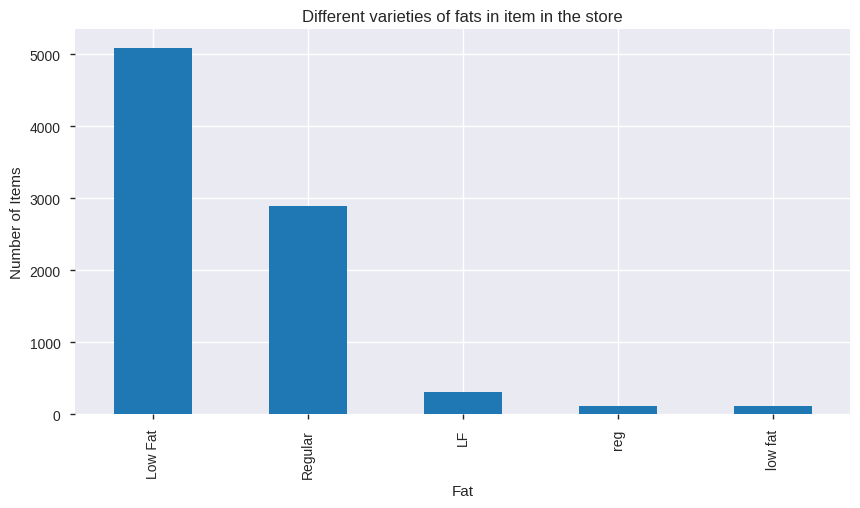

In [32]:
# checking different varieties of item fat content

train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

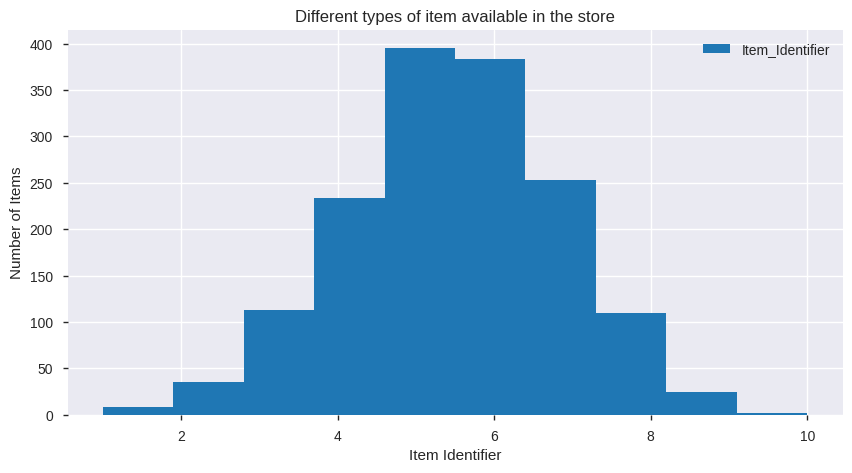

In [33]:
# analysing only the items available in the store

train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Distribution of Item Weight')

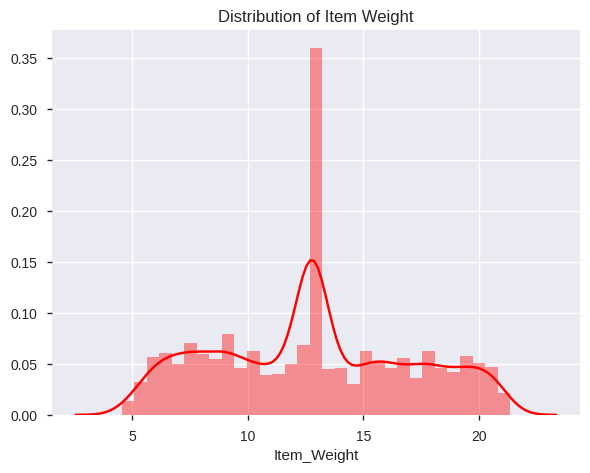

In [34]:
###  checking the distribution of Item_Weight variable using count plot
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['Item_Weight'], color = 'red')
plt.title('Distribution of Item Weight')

Text(0.5, 1.0, 'Item_Visibility')

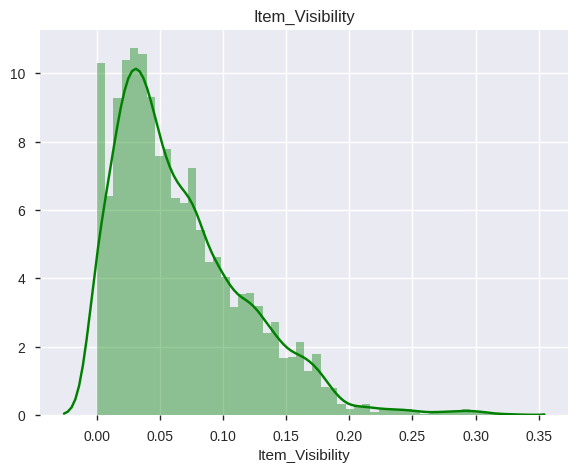

In [35]:
###  checking the distribution of Item_Visibility using count plot
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(train['Item_Visibility'], color = 'green')
plt.title('Item_Visibility')


Text(0.5, 1.0, 'Item MRP')

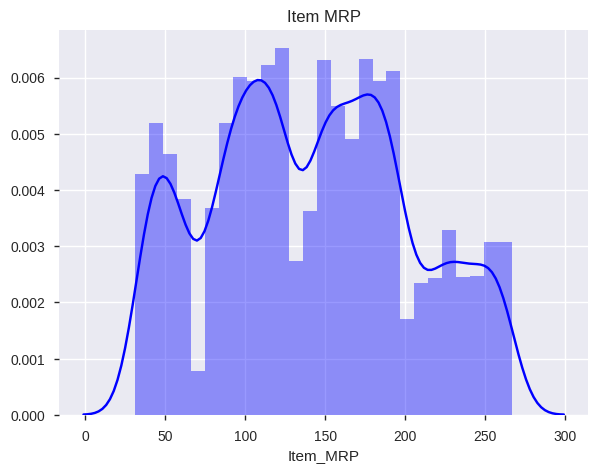

In [36]:
###  checking the distribution of a Item_Mrp variable using count plot
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(train['Item_MRP'], color = 'blue')
plt.title('Item MRP')

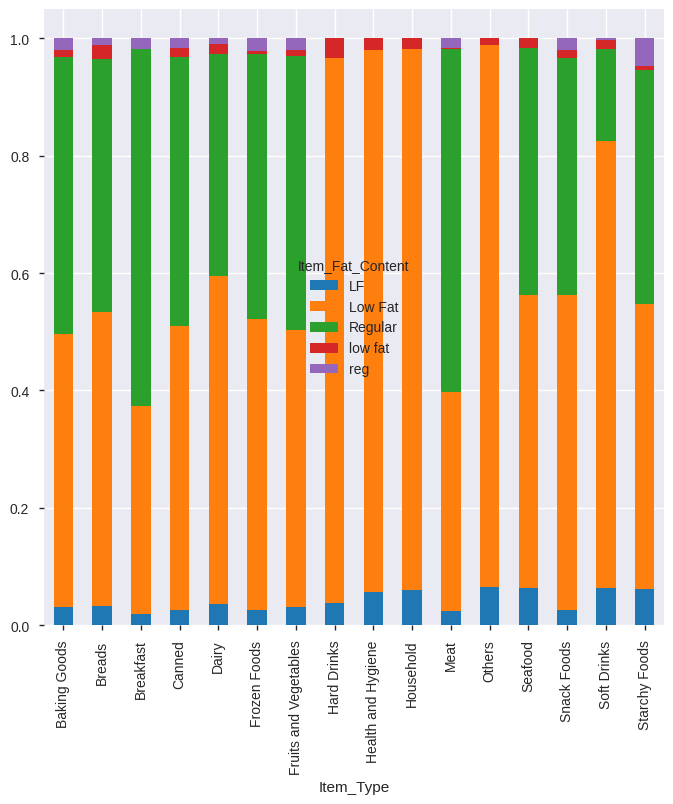

In [38]:
# viz for 2 variables

Item_Type = pd.crosstab(train['Item_Type'], train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8, 8))

In [39]:
# checking the unique items in the train

train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [40]:
# checking the unique items in the test

test.apply(lambda x : len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

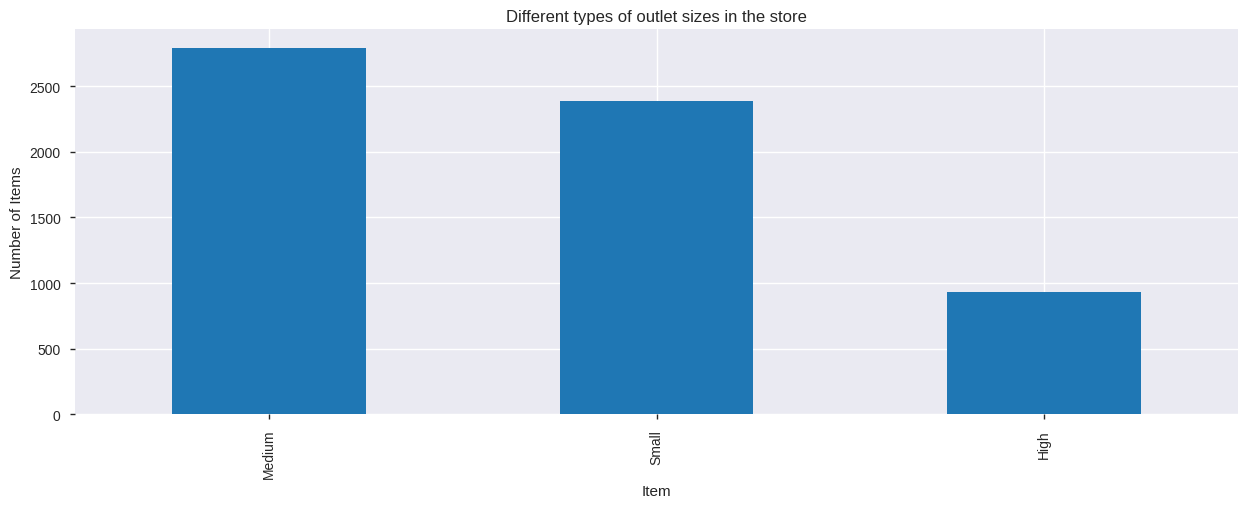

In [42]:
# we will analyze only the training set
# checking only the outlet size among the stores
train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.rcParams['figure.figsize'] = (5, 5)
plt.show()

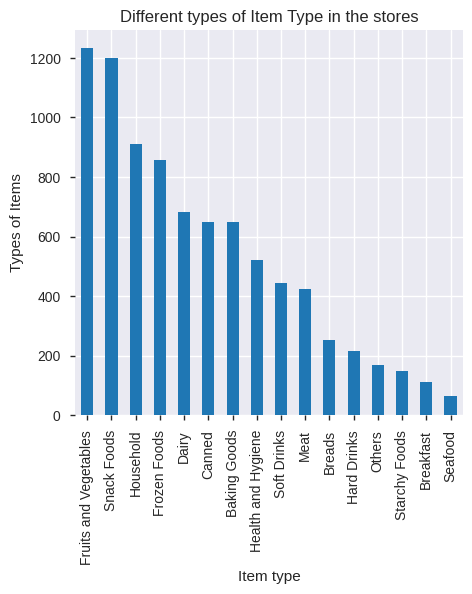

In [43]:
# analysing only the item types in the stores

train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of Item Type in the stores')
plt.xlabel('Item type')
plt.ylabel('Types of Items')
plt.show()

In [44]:
# determining the time establishment started

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

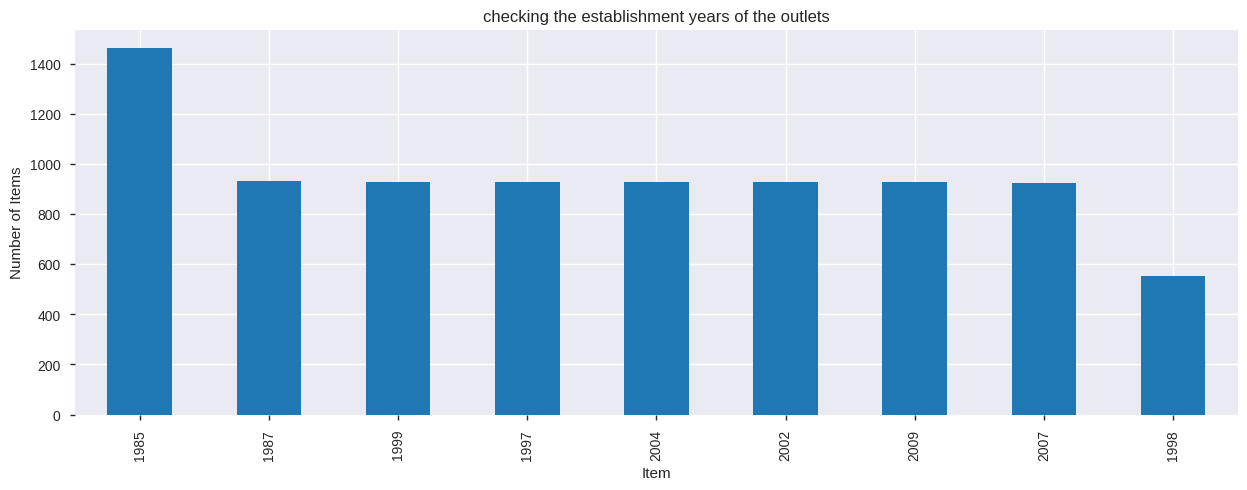

In [45]:
# checking the establishment years of the outlets
plt.rcParams['figure.figsize'] = (15, 5)

train['Outlet_Establishment_Year'].value_counts(normalize = True)
train['Outlet_Establishment_Year'].value_counts().plot.bar()
plt.title('checking the establishment years of the outlets')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [46]:
#checking the Outlet Identifier count
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

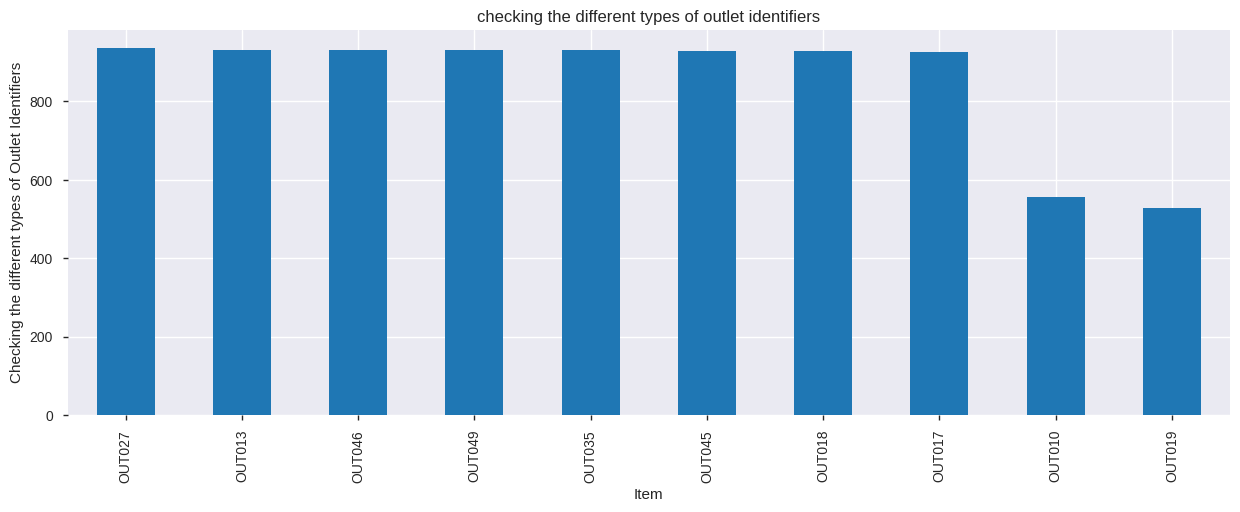

In [47]:
# checking the establishment years of the outlets
plt.rcParams['figure.figsize'] = (15, 5)

train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('checking the different types of outlet identifiers')
plt.xlabel('Item')
plt.ylabel('Checking the different types of Outlet Identifiers')
plt.show()

In [48]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
Outlet_Years                   int64
dtype: object

In [49]:
# Getting the first two characters of ID to separate them into different categories

data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

Series([], Name: Item_Identifier, dtype: int64)

In [50]:
# label encoding

from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Years
0,0,0,7567,2540,4,1097,284,4,9,0,1,1,4
1,1,0,632,422,14,1436,57,8,3,2,1,2,0
2,0,0,3897,1639,10,1172,376,4,9,0,1,1,4
3,1,0,5626,670,6,0,393,3,0,2,1,0,5
4,0,0,848,865,9,0,265,1,1,2,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,0,3881,835,13,718,298,2,8,0,2,1,6
5677,1,0,5069,835,15,11820,180,8,3,2,1,2,0
5678,0,0,3196,835,8,8009,293,5,7,1,1,1,3
5679,1,0,6626,835,3,0,354,7,2,1,1,1,1


In [51]:
# one hot encoding the data to get dummy variables

data = pd.get_dummies(data)

print(data.shape)


(14204, 44)


In [52]:
# splitting the data into dependent and independent variables

x = data
y = data.Item_Outlet_Sales

print(x.shape)
print(y.shape)

(14204, 44)
(14204,)


In [0]:
# splitting into train and test for modelling

train = data.iloc[:8523,:]
test = data.iloc[8523:,:]

In [54]:
# making x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9942, 44)
(9942,)
(4262, 44)
(4262,)


In [55]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

[6622.7126  958.752  3579.3408 ...  279.636  4452.8704  705.748 ]
RMSE : 9.186108167282568e-13
Variance score: 1.00


In [66]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(x_train, y_train))

[6619.889608  958.752    3579.833492 ...  280.321774 4454.221974
  704.18337 ]
RMSE : 39.62801138375659
Variance score: 1.00
Result : 0.9999916265613055


In [67]:
# Support Vector Machine

from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)

# predicting the x test results
y_pred = model.predict(x_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(x_train, y_train))

RMSE : 739.6891301536357
Variance score: 0.74
Result : 0.7490125535919516


In [68]:
# Gradient Boosting Algorithm
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(x_train, y_train))

[6644.58497133  958.79359285 3549.60992544 ...  283.09187733 4446.88581339
  736.69517521]
RMSE : 30.42838358308164
Variance score: 1.00
Result : 0.9999400663817338


In [69]:
# Decision Tree Regressor 

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(x_train, y_train))

[6615.3888  958.752  3579.3408 ...  282.2992 4454.202   701.7532]
 RMSE :  30.028006703468485
Variance score: 1.00
Result : 1.0


In [70]:
# Adaboost
from sklearn.ensemble import AdaBoostRegressor

model =  AdaBoostRegressor(random_state=0, n_estimators=100)
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(x_train, y_train))

[6798.19356598  977.4344068  3498.48096348 ...  357.41542065 4517.40815337
  809.99606702]
 RMSE :  121.48048104773004
Variance score: 0.99
Result : 0.9939541181004856


After using 6 algorthims on the train data and testing the same on unseen test data we can see that Linear Regression has yielded the lowest RMSE Score of 9.18, as lower the RMSE value the better as it is able to explain the variance in the data points in a much better way. And RMSE is defined by how close the predicted values are in terms of the observed data points. Lower values of RMSE indicate better fit.
Hence, Linear Regression result would be selected.